1. Setup

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
df = pd.read_csv("air_12318.csv")
df['time'] = pd.to_datetime(df['time'])
df = df.sort_values('time')
# Convert time column to datetime

In [103]:
print(df.columns.tolist())

['id', 'time', 'epoch', 'air', 'device', 'mVa_V', 'mVb_V', 'mVc_v', 'mVa-mBb_V', 'mVb-mVc_V', 'mVc-mVa_V', 'va_V', 'vb_V', 'vc_V', 'va-vb_V', 'vb-vc_V', 'vc-va_V', 'ia_A', 'ib_A', 'ic_A', 'pa_W', 'pb_W', 'pc_W', 'qa_Var', 'qb_Var', 'qc_Var', 'sa_VA', 'sb_VA', 'sc_VA', 'ptot_W', 'qtot_Var', 'stot_VA', 'pfa_None', 'pfb_None', 'pfc_None', 'pftot_None', 'expwh_Kwh*10', 'expvar_Kvarh*10', 'freq_Hz*10', 'temp_Degrees Celsius', 'pressure_Bar', 'fuel_%', 'vbat_V', 'hours_sec']


In [104]:
print(df.shape)
print(df.head())


(510797, 44)
        id                      time       epoch    air  device  mVa_V  mVb_V  \
5  2258572 2023-02-24 08:56:14+00:00  1677228974  12318       1      0    0.0   
6  2271340 2023-02-28 11:05:31+00:00  1677582331  12318       1    231    NaN   
7  2271341 2023-02-28 11:05:41+00:00  1677582341  12318       1    232    NaN   
8  2271342 2023-02-28 11:05:51+00:00  1677582351  12318       1    232    NaN   
9  2271345 2023-02-28 11:06:01+00:00  1677582361  12318       1    232    NaN   

   mVc_v  mVa-mBb_V  mVb-mVc_V  ...  pfc_None  pftot_None  expwh_Kwh*10  \
5    0.0        0.0        0.0  ...       0.0         0.0           0.0   
6    NaN        NaN        NaN  ...       NaN         NaN           NaN   
7    NaN        NaN        NaN  ...       NaN         NaN           NaN   
8    NaN        NaN        NaN  ...       NaN         NaN           NaN   
9    NaN        NaN        NaN  ...       NaN         NaN           NaN   

   expvar_Kvarh*10  freq_Hz*10  temp_Degrees Cels

2. Basic Exploration (EDA)

In [105]:
print(df.describe())
# Summary statistics

                 id         epoch       air    device          mVa_V  \
count  5.107970e+05  5.107970e+05  510797.0  510797.0  510797.000000   
mean   1.025530e+07  1.722158e+09   12318.0       1.0      24.724227   
std    5.015867e+06  2.120067e+07       0.0       0.0      73.156395   
min    1.700000e+01  1.677229e+09   12318.0       1.0       0.000000   
25%    6.381579e+06  1.708735e+09   12318.0       1.0       0.000000   
50%    9.953322e+06  1.724083e+09   12318.0       1.0       0.000000   
75%    1.429909e+07  1.739542e+09   12318.0       1.0       0.000000   
max    1.984786e+07  1.754950e+09   12318.0       1.0     255.000000   

               mVb_V          mVc_v      mVa-mBb_V      mVb-mVc_V  \
count  510775.000000  510775.000000  510775.000000  510775.000000   
mean       24.905581      24.976992      42.792566      43.220571   
std        73.705248      73.916944     126.643959     127.906630   
min         0.000000       0.000000       0.000000       0.000000   
25%   

In [106]:
print(df.isna().sum())
# Missing values check

id                       0
time                     0
epoch                    0
air                      0
device                   0
mVa_V                    0
mVb_V                   22
mVc_v                   22
mVa-mBb_V               22
mVb-mVc_V               22
mVc-mVa_V               22
va_V                    22
vb_V                    22
vc_V                    22
va-vb_V                 22
vb-vc_V                 22
vc-va_V                 22
ia_A                    22
ib_A                    22
ic_A                    22
pa_W                    22
pb_W                    22
pc_W                    22
qa_Var                  22
qb_Var                  22
qc_Var                  22
sa_VA                   22
sb_VA                   22
sc_VA                   22
ptot_W                  22
qtot_Var                22
stot_VA                 22
pfa_None                22
pfb_None                22
pfc_None                22
pftot_None              22
expwh_Kwh*10            22
e

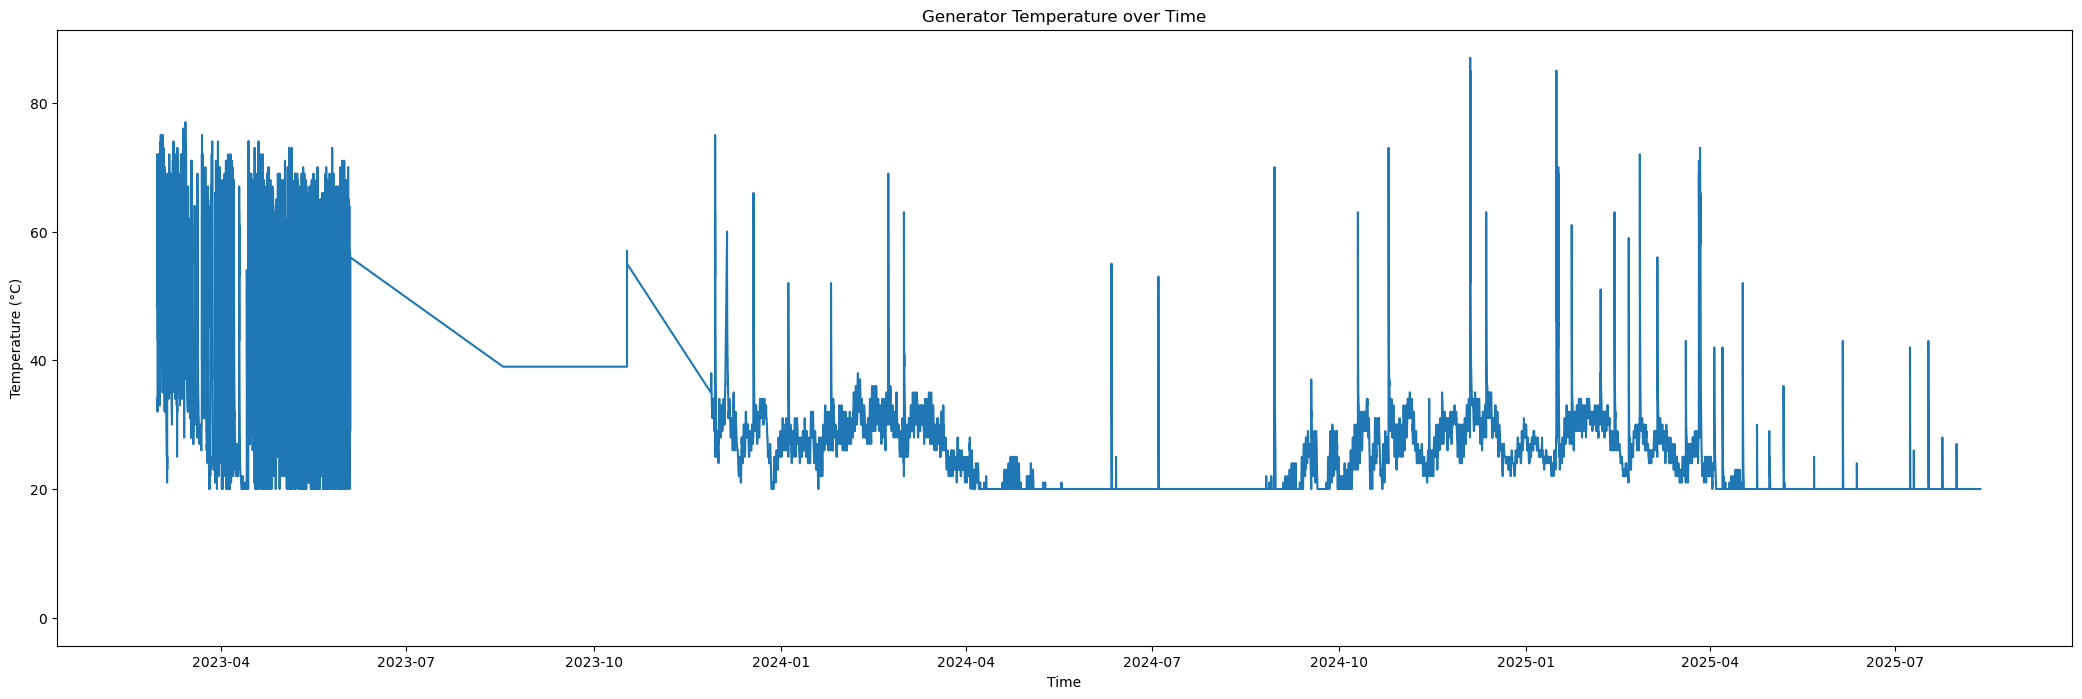

In [107]:
# Plot key signals over time
plt.figure(figsize=(26,8))
plt.plot(df['time'], df['temp_Degrees Celsius'])
plt.title("Generator Temperature over Time")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.show()

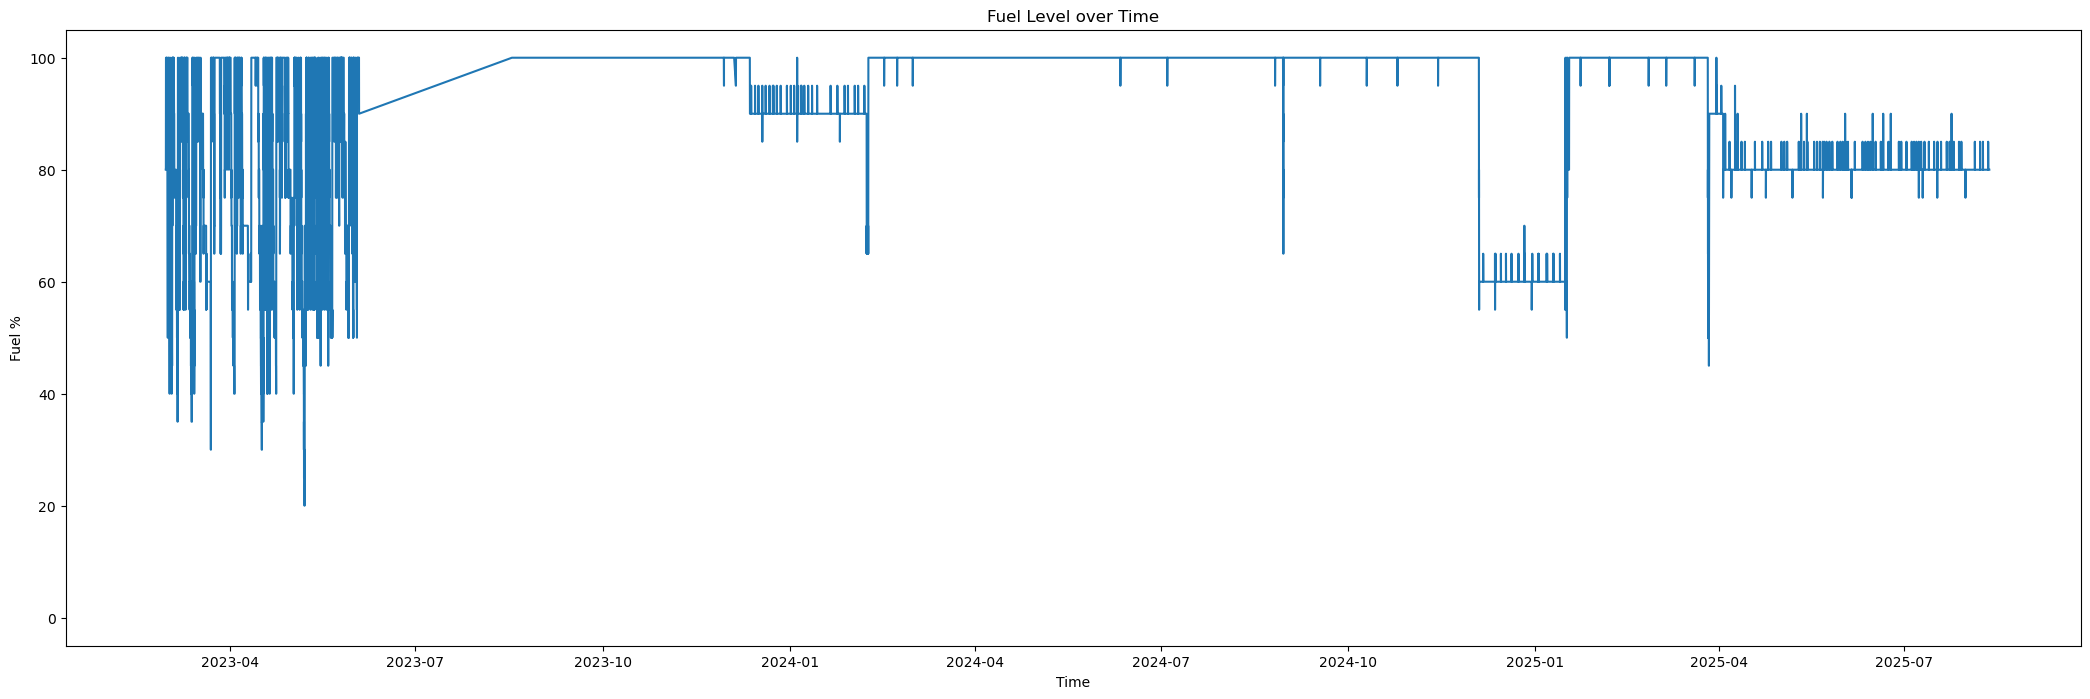

In [108]:
plt.figure(figsize=(26,8))
plt.plot(df['time'], df['fuel_%'])
plt.title("Fuel Level over Time")
plt.xlabel("Time")
plt.ylabel("Fuel %")
plt.show()

In [109]:
print(df['ia_A'].describe())

count    510775.000000
mean          6.352668
std          20.466826
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         204.000000
Name: ia_A, dtype: float64


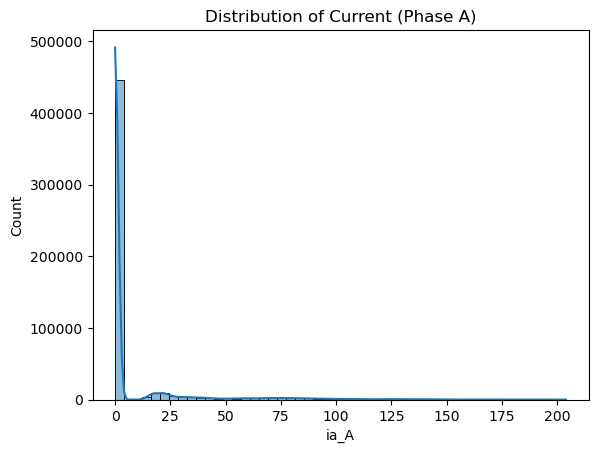

In [110]:
# Histogram of currents
sns.histplot(df['ia_A'], bins=50, kde=True)
plt.title("Distribution of Current (Phase A)")
plt.show()


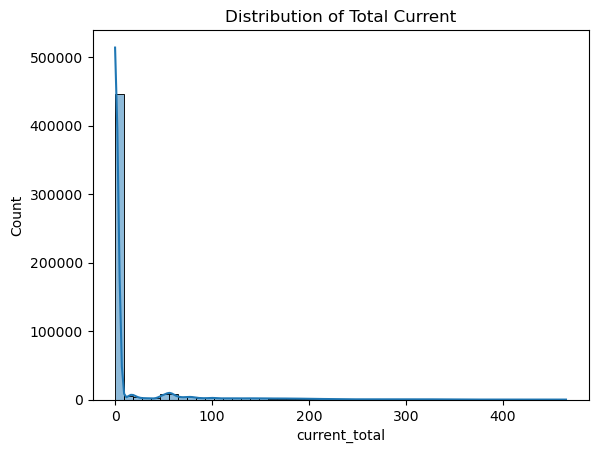

In [111]:
df['current_total'] = df[['ia_A','ib_A','ic_A']].sum(axis=1)
sns.histplot(df['current_total'], bins=50, kde=True)
plt.title("Distribution of Total Current")
plt.show()

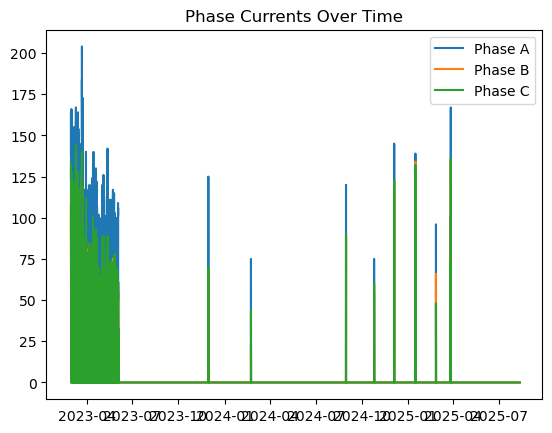

In [112]:
plt.plot(df['time'], df['ia_A'], label='Phase A')
plt.plot(df['time'], df['ib_A'], label='Phase B')
plt.plot(df['time'], df['ic_A'], label='Phase C')
plt.legend(); plt.title("Phase Currents Over Time"); plt.show()

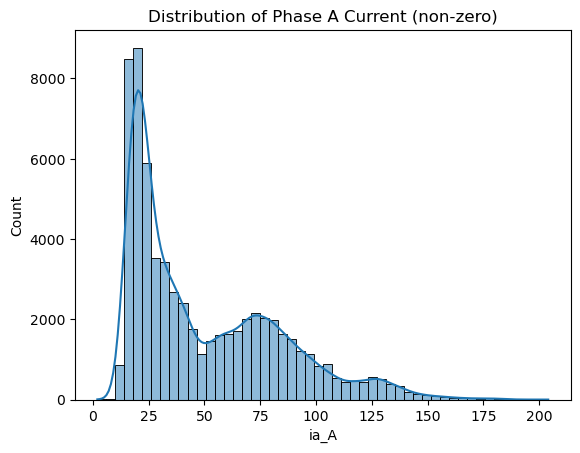

In [113]:
sns.histplot(df[df['ia_A'] > 0]['ia_A'], bins=50, kde=True)
plt.title("Distribution of Phase A Current (non-zero)")
plt.show()

3. Feature Engineering (examples)

In [ ]:
df['is_running'] = (df['ptot_W'] > 100).astype(int)  # adjust threshold

In [115]:
# Rolling averages and stds (30 min window if data is frequent)
df = df.set_index('time')  # makes rolling easier

In [116]:
df['temp_mean_30m'] = df['temp_Degrees Celsius'].rolling('30min').mean()
df['temp_std_30m']  = df['temp_Degrees Celsius'].rolling('30min').std()

In [117]:
df['fuel_diff'] = df['fuel_%'].diff()
df['power_sum'] = df['pa_W'] + df['pb_W'] + df['pc_W']

In [118]:
# Voltage imbalance
df['voltage_imbalance'] = df[['mVa_V','mVb_V','mVc_v']].std(axis=1)

In [119]:
# Reset index for saving
df = df.reset_index()


In [120]:
print(df.head())

                       time       id       epoch    air  device  mVa_V  mVb_V  \
0 2023-02-24 08:56:14+00:00  2258572  1677228974  12318       1      0    0.0   
1 2023-02-28 11:05:31+00:00  2271340  1677582331  12318       1    231    NaN   
2 2023-02-28 11:05:41+00:00  2271341  1677582341  12318       1    232    NaN   
3 2023-02-28 11:05:51+00:00  2271342  1677582351  12318       1    232    NaN   
4 2023-02-28 11:06:01+00:00  2271345  1677582361  12318       1    232    NaN   

   mVc_v  mVa-mBb_V  mVb-mVc_V  ...  fuel_%  vbat_V  hours_sec  current_total  \
0    0.0        0.0        0.0  ...     0.0     0.0        0.0            0.0   
1    NaN        NaN        NaN  ...     NaN     NaN        NaN            0.0   
2    NaN        NaN        NaN  ...     NaN     NaN        NaN            0.0   
3    NaN        NaN        NaN  ...     NaN     NaN        NaN            0.0   
4    NaN        NaN        NaN  ...     NaN     NaN        NaN            0.0   

   is_running  temp_mean_3

 4. Save Features for Modeling

In [121]:
df.to_csv("air_12318_features.csv", index=False)